<h1><center>Mineração Estatística de Dados</center></h1>

<h2><center>Projeto 4: Clustering</center></h2>
<br>
<br>
<br>


<h2><center>Bruno Gomes Coelho - 9791160</center></h2>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Imports e ler os dados

In [5]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.datasets import make_moons

TESTING = True



- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Q1

**Consider os dados gerados pelo código `create_data`. Usando o método k-means, determine o número ideal de sementes (Elbow Method) para noise=0.1, 0.2 e 0.5.**

In [13]:
def create_data(noise, plot=False):
    n_samples = 200
    X, y = make_moons(n_samples=n_samples, noise=noise)
    d = np.column_stack((X,np.transpose(y)))
    data = pd.DataFrame(data = d, columns=['X1', 'X2', 'y']) 

    if plot:
        colors = ['red', 'blue', 'green', 'black']
        features_names = ['X1', 'X2']
        class_labels = np.unique(y)
        aux = 0
        for c in class_labels:
            ind = np.where(y == c)
            plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
            aux = aux + 1
            plt.legend()
            plt.show()

    return data

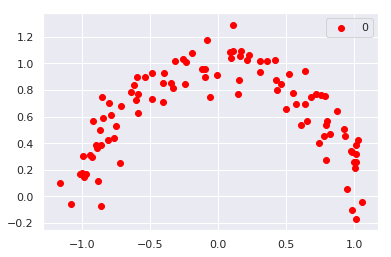

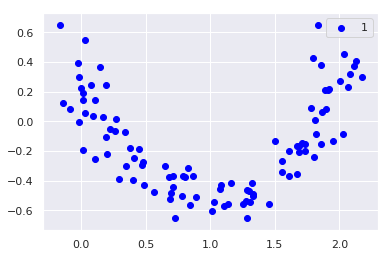

In [10]:
df = create_data(noise=0.1, plot=True)

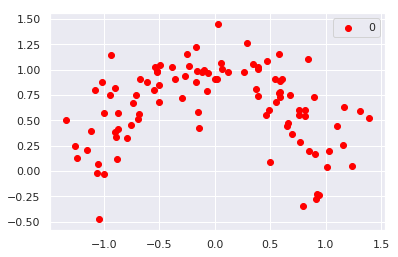

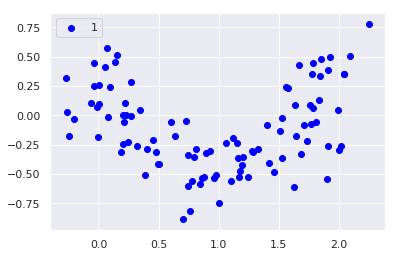

In [11]:
df = create_data(noise=0.2, plot=True)

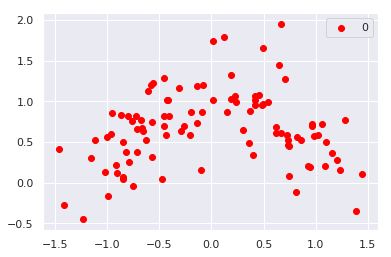

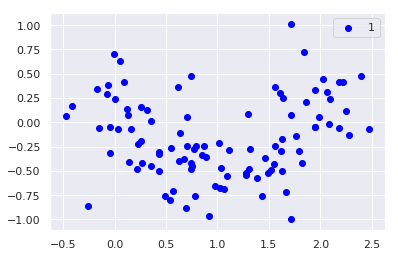

In [12]:
df = create_data(noise=0.3, plot=True)



- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Q2

**Construa um gráfico da medida silhouette_score em função do nível de ruído noise. Considere os métodos k-means e spectral clustering.**



- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Q3

**Para o método DBSCAN, varie os valores eps e min_samples para obter o máximo da medida silhouette_score. Grafique os resultados para os melhores valores encontrados**



- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Q4

**Compare os métodos de clustering para os dados da iris usando a medida normalize mutual information (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html).**



- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Q5

**Projete os dados usando PCA e faça um gráfico de F1 em termos do número de components. Quantos components oferecem a maior taxa de acerto? Compare com a curva “cumulative explained variance” versus “number of components” e explique os resultados.**

# LALALALALALLAA

# Q1

**Considere os dados gerados com a função:** `skdata.make_moons(n_samples=n_samples, noise=p)`.

**Construa um gráfico da acurácia versus a taxa de ruído para os algoritmos random  forest  e  redes  neurais.  Considerem  uma  média  de  ao  menos  10 simulações.**

In [2]:
def run_models(x, y, processing="Nada", testing=False, val_idx=None, train_idx=None,
               names=["RF", "MLP"],
               models=[RandomForestClassifier(), MLPClassifier()], 
               result_cols=["Score", "Model", "Pré-Processamento"]):
    """Helper function for quickly evaluating RF and Neural networks"""
    
    model_results = []
    all_results = pd.DataFrame(columns=result_cols)

    for model, name in zip(models, names):
        scaler = StandardScaler()
        scaled_x = scaler.fit_transform(x)
        if val_idx is not None:
            scaled_x = pd.DataFrame(scaled_x, columns=x.columns)
            if train_idx is not None:
                model.fit(scaled_x.iloc[train_idx], y.iloc[train_idx])
                mean_score = accuracy_score(y.iloc[val_idx], 
                                            model.predict(scaled_x.iloc[val_idx]))
            else:
                model.fit(scaled_x[~val_idx], y[~val_idx])
                mean_score = accuracy_score(y[val_idx], 
                                            model.predict(scaled_x[val_idx]))
        # Neither a val nor train index was passed;
        # We shall use 5 fold cross validation
        else:
            mean_score = cross_val_score(model, scaled_x, y, scoring="accuracy", 
                                     cv=5, n_jobs=-1).mean()
        model_results.append(mean_score)
        all_results.loc[len(all_results)] = [mean_score, name, processing]
    return all_results

In [3]:
%%capture
%%time
noises = [x/10 for x in range(10)]
df_cols = ["Score", "Model", "Ruido %"]
all_results = pd.DataFrame(columns=df_cols)

for noise in noises:
    for _ in range(N_SIMUL):
        x, y = make_moons(n_samples=N_SAMPLES, noise=noise)
        all_results = all_results.append(run_models(x, y, processing=f"{100*noise}%",
                                                    result_cols=df_cols),
                                         ignore_index=True, sort=False)

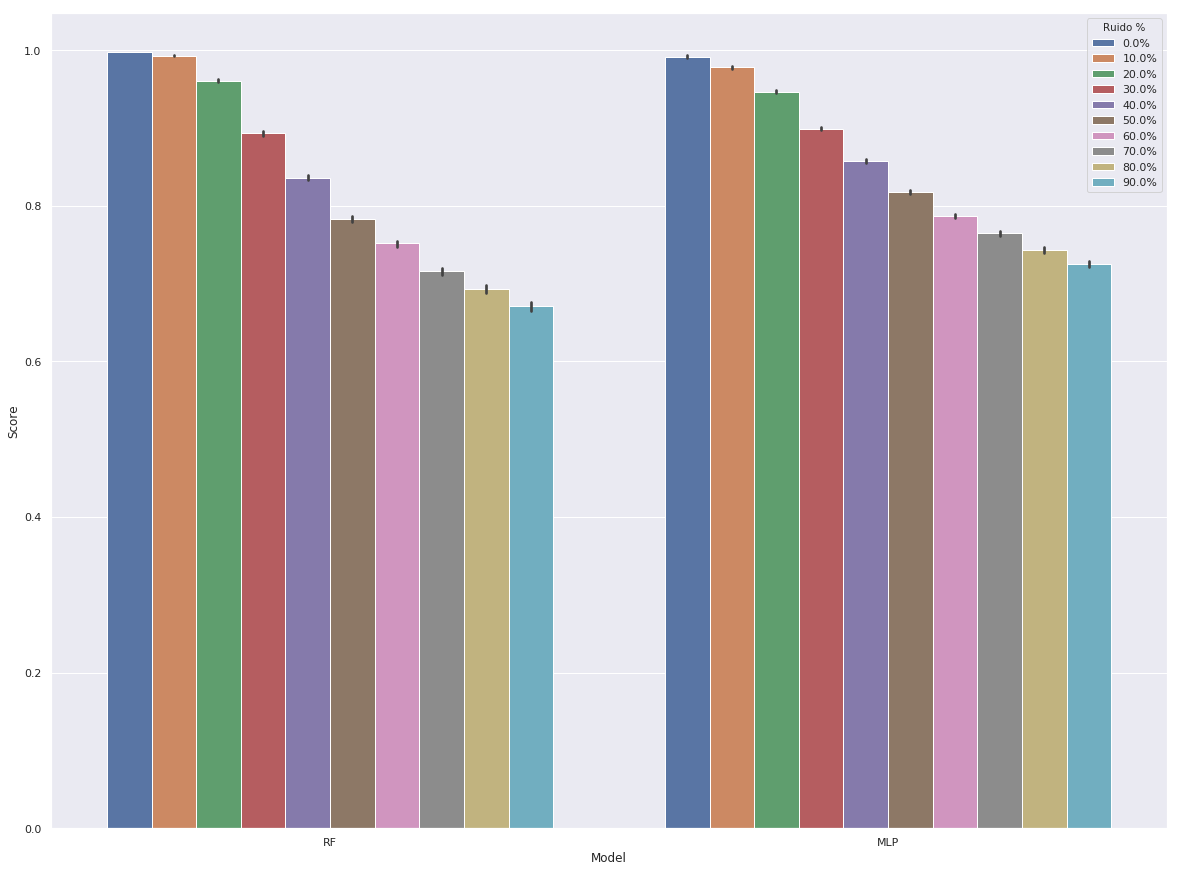

In [4]:
plt.figure(figsize=(20, 15))
sns.barplot(data=all_results, y="Score", x="Model", hue="Ruido %")

Conforme podemos ver pelo gráfico acima, ambos os modelos têm um queda de acuraácia conforme aumentamos a quantidade de ruídos, conforme esperado;

Podemos também notar que o aumento de ruído causa um aumento no desvio padrão das 50 simulações, também esperado pois acaba sendo mais difícil entre cada rodada o classificador aprender algo.

Por fim notamos que com exceto para ruídos <= 10%, a Random Forest se mostrou mais suceptível a aprender o ruído e overfitar que a MLP. 





- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Q2

**No caso do algoritmo random forest, faça um gráfico da acurácia em função do número de árvores para a base Vehicle. Considere uma média de ao menos 10 simulações.**

In [5]:
FILE = "data/Vehicle.csv"
df = pd.read_csv(FILE)
print(f"Quantidade de nulos: ", df.isna().sum().sum())
print(df.shape)
df.head()

Quantidade de nulos:  0
(846, 19)


,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


## Vamos escalar os dados devido a MLP

Isso ajuda no seu processo de convergência.

In [6]:
scaler = StandardScaler()
std_df = scaler.fit_transform(df.drop(columns=["Class"]))

In [7]:
param_grid = {
    "n_estimators": [x for x in range(1, 300, 10)]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, 
                           scoring="accuracy", n_jobs=-1, cv=5, verbose=1, 
                           return_train_score=False)

In [8]:
%%time
grid_search.fit(std_df, df["Class"])

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   12.9s finished


CPU times: user 347 ms, sys: 53.5 ms, total: 401 ms
Wall time: 13.3 s


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251, 261, 271, 281, 291]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=1)

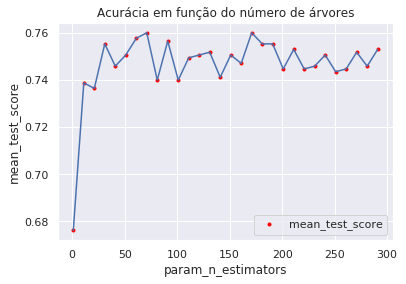

In [9]:
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values("rank_test_score", inplace=True)

plt.plot(results["param_n_estimators"], results["mean_test_score"], ".", color="red")
sns.lineplot(x="param_n_estimators", y="mean_test_score", data=results)
plt.title("Acurácia em função do número de árvores");

In [10]:
print(f"Melhor Acurácia: {grid_search.best_score_}\n", 
      f"Melhor parâmetro: {grid_search.best_params_}")

Melhor Acurácia: 0.7600472813238771
 Melhor parâmetro: {'n_estimators': 71}


Conforme podemos observar acima, apenas 1 árvore de decisão na Random Forest possui um resultado horrível;

Além disso, a faixa de valores altos estão todos entre 11 e 121 árvores de decisão - acima disso parece que a tendência são resultado mais baixos a partir de 130 árvores, até o limite superior testado de 300.

Vêmos que mesmo entre 11 e 121 temos uma flutuação grande - o valor com o maior acurácia foram 51 estimadores, que será o usado de agora em diante para futuras comparações.



- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Q3

**Verifique a influencia do número de camadas da rede neural na classificação para a base Vehicle. Considere o exemplo mostrado na aula.**

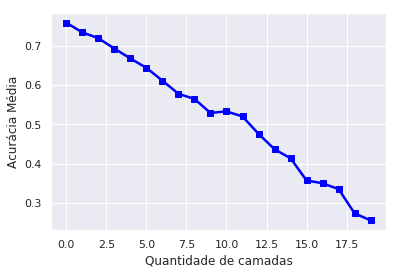

In [11]:
num_neurons = 10
all_scores = []
all_layers = []
num_layers = range(20) 
layers = (num_neurons,) # we'll have to append to this tupple each interaction

for nl in num_layers:
    all_layers.append(layers)
    accuracy = []
    
    for s in range(N_SIMUL): # average over Ns simulations
        train_x, test_x, train_y, test_y = train_test_split(df.drop(columns="Class"), 
                                                            df["Class"], 
                                                            test_size = 0.7,
                                                           random_state=s)
        scaler = MinMaxScaler()  
        scaler.fit(train_x)  
        train_x = scaler.transform(train_x)  
        test_x = scaler.transform(test_x)  
        clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                            hidden_layer_sizes=layers, random_state=s)
        clf.fit(train_x, train_y)
        pred_y = clf.predict(test_x)
        accuracy.append(accuracy_score(pred_y, test_y))
    all_scores.append(np.mean(accuracy))
    layers = layers + (num_neurons,) # increase the number of layers

plt.plot(num_layers, all_scores, marker='s', linestyle='-', color="blue", linewidth=2.5)
plt.xlabel("Quantidade de camadas")
plt.ylabel("Acurácia Média")
plt.grid(True)
plt.show(True)


In [21]:
best_layer_amount = all_layers[np.argmax(all_scores)]
print(f"Melhor configuração de camadas: {best_layer_amount}")

Melhor configuração de camadas: (10,)


Para esse experimentamos, testamos de 1 a 20 camadas, cada vez adicionando 10 neurônios por camada. Rodamos cada experimento 50 vezes e tiramos a média para apresentar o resultado e diminuir efeitos de aleatoriedade.

Percebemos que conforme aumentamos a quantidade camadas, temos um queda em acurácia, quase linearmente. Nossa melhor acurácia é obtida com apenas 1 camada escondida.

Isso pode ser tanto devido ao fato que o problema não necessita de um modelo complexo, quanto a quantidade baixa de dados em si, fazendo com quem um modelo desnecessariamente complexo aprenda ruído e *overfite*.

Com esse estudo, percebemos também a importância de se analisar a influência dos hiper parâmetros sobre seu conjunto de dados/problema - gostaríamos até de desenvolver uma análise mais profunda, mas infelizmente o tempo de execução demorado para se treinar MLP profundas nos limitou.



- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Q4
**Analise outras função que definem o parâmetro solver da rede neural e compare os resultados para a base Vehicle. Isto, considere os casos: `solver= {‘lbfgs’,  ‘sgd’,  ‘adam’}`.  Considere  a  rede  neural  com  a  melhor  configuração (número de camadas) no exercício anterior.**

<br>
<br>
<br>


Vamos primeiros ver qual a melhor configuração das camadas:

In [13]:
best_layer_amount = all_layers[np.argmax(all_scores)]
print(f"Melhor configuração de camadas: {best_layer_amount}")

Melhor configuração de camadas: (10,)


In [14]:
solvers = ["lbfgs", "sgd", "adam"]

In [28]:
%%capture 

df_cols = ["Score", "Model", "Solver"]
all_results = pd.DataFrame(columns=df_cols)

for solver in solvers:
    for i in range(N_SIMUL):
        all_results = all_results.append(run_models(df.drop(columns="Class"), 
                                                    df["Class"], 
                                                    names=["MLP"],
                                                    models=[MLPClassifier(solver=solver,
                                                                         random_state=i)],
                                                    processing=solver, 
                                                    result_cols=df_cols),
                                            ignore_index=True)
        

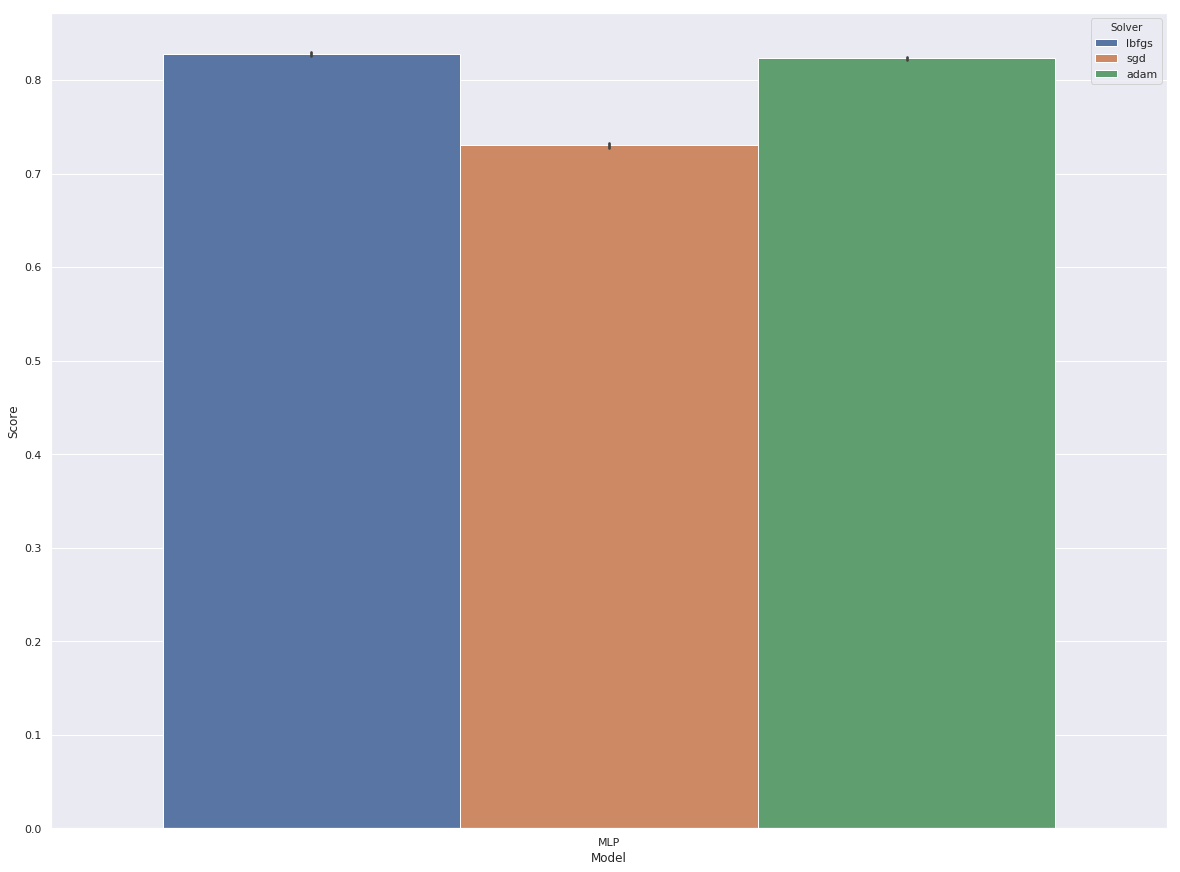

In [29]:
plt.figure(figsize=(20, 15))
sns.barplot(data=all_results, y="Score", x="Model", hue="Solver")

In [30]:
for solver in all_results["Solver"].unique():
    temp = all_results.query("Solver == @solver")["Score"]
    print(f"Resultado para o solver {solver}:", 
          temp.mean(), "+-", temp.std())

Resultado para o solver lbfgs: 0.8281006127621076 +- 0.008358397676498708
Resultado para o solver sgd: 0.7304833077982488 +- 0.009178947648763442
Resultado para o solver adam: 0.8235233766128818 +- 0.005808981644246084


De acordo com nosso experimento, tanto o solver "lbfgs" como o "adam" alcançaram resultado muito parecidos, em torno de 82%. O "lbfgs" obteve um resultado final levemente melhor, de ~82.8%. Apenas o "sgd" obteve um resultado significativamente abaixo do esperado, com 73% de acurácia.

Nos 3 casos, o desvio padrão das 50 repetições foi sempre menor que 0.01.



- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Q5

**Verifique  a  influência  do  tamanho  do  conjunto  de  treinamento  nos classificadores random forest e neural networks. Essa análise é semelhante à realizada no projeto 1.**

In [ ]:
%%time
df_cols = ["Score", "Model", "% do treino"]
all_results = pd.DataFrame(columns=df_cols)
val_idx = np.random.choice([False, True], size=len(df), p=[0.7, 0.3])

fractions = [x/10 for x in range(1, 11)]
scores = []
for i in range(N_SIMUL):
    for frac in fractions:
        train_idx = pd.DataFrame(df[~val_idx]).sample(frac=frac).index
        all_results = all_results.append(run_models(df.drop(columns="Class"), df["Class"], 
                                                    processing=str(100*frac), 
                                                    result_cols=df_cols,
                                                    val_idx=val_idx, train_idx=train_idx),
                                         ignore_index=True)

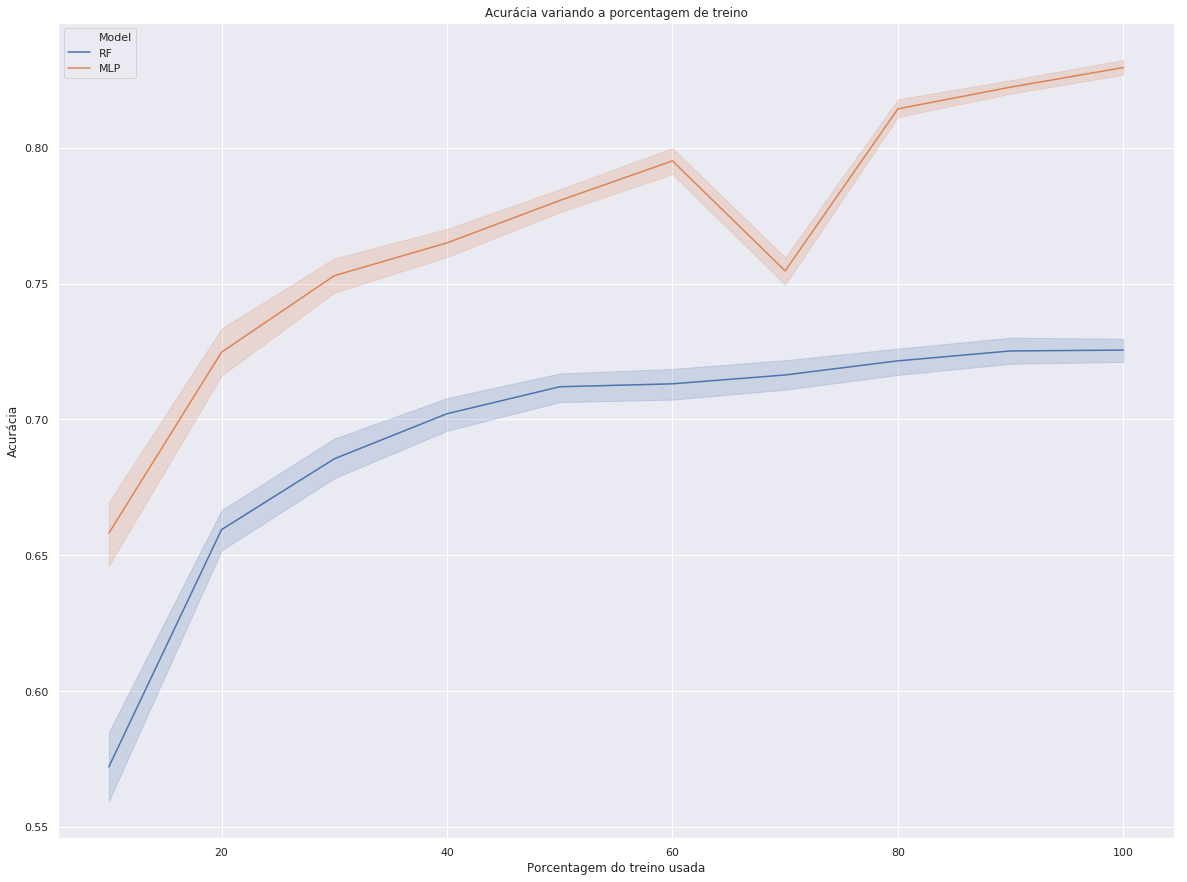

In [20]:
plt.figure(figsize=(20, 15))
all_results["% do treino"] = all_results["% do treino"].astype(float)
sns.lineplot(data=all_results, y="Score", x="% do treino", hue="Model")
plt.title("Acurácia variando a porcentagem de treino")
plt.xlabel("Porcentagem do treino usada");
plt.ylabel("Acurácia");

Conforme podemos observar (e era de ser esperado), um aumento na quantidade do conjunto de treino resulta numa acurácia melhor para os dois modelos - isso se deve a baixa quantidade de dados que temos, ou seja, mais exemplos acabam sendo úteis para o modelos aprender divisões no espaço úteis.

Além disso, a MLP se mostrou sempre melhor que a RF, para todas as porcentagems de treino testadas - isso talvez pode ser explicado ao fato de a MLP ter apenas 1 camada escondida com 10 neurônios, possivelmente um modelo menos complexo que a RF, ou seja, que se mostra menos tendencioso a aprender ruídos na baixa quantidade de dados disponíveis como conjunto de treino.